In [1]:
#include <string>
#include <fstream>

#include "xtl/xbase64.hpp"
#include "nlohmann/json.hpp"

namespace im {
    struct image {
        inline image(const std::string& filename) {
            std::ifstream fin(filename, std::ios::binary);
            m_buffer << fin.rdbuf();
        }

        std::stringstream m_buffer;
    };

    nlohmann::json mime_bundle_repr(const image& i) {
        auto bundle = nlohmann::json::object();
        bundle["image/png"] = xtl::base64encode(i.m_buffer.str());
        return bundle;
    }
}

In [2]:
im::image karina("girl.jpg");
auto mime = im::mime_bundle_repr(karina);

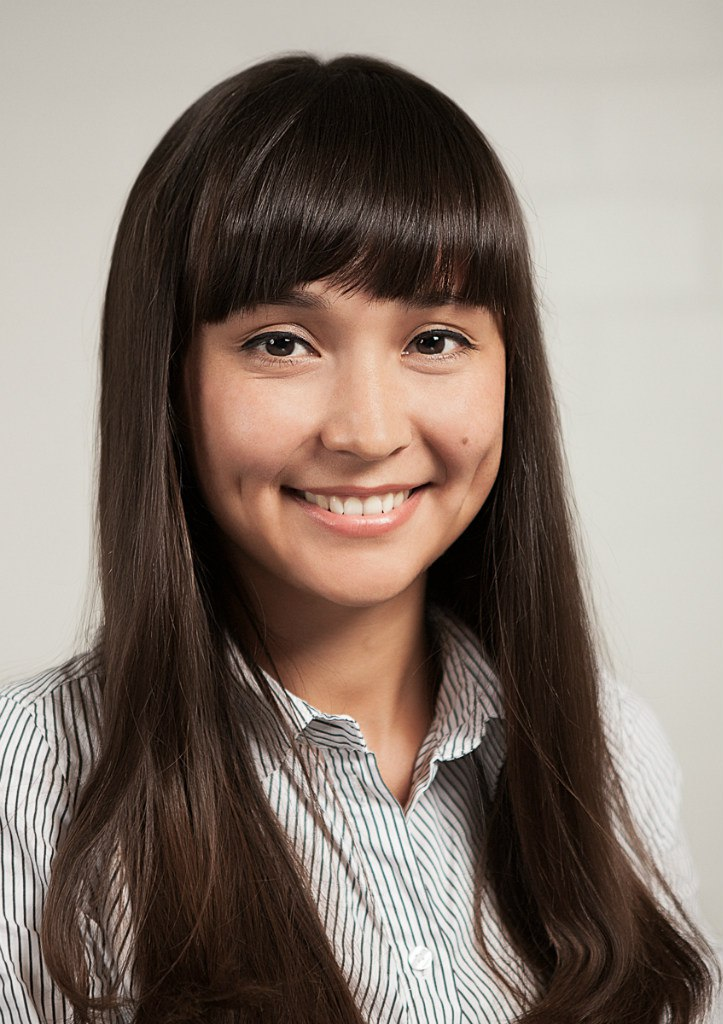

In [3]:
xeus::get_interpreter().display_data(
    std::move(mime),
    nlohmann::json::object(),
    nlohmann::json::object()
)